In [ ]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

bigPath = 'C:\\Users\\aashi\\OneDrive\\Desktop\\school\\SFSU\\semester4 F19\\ENGR 478\\EMILA-CODE\\MachineLearning\\'

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    print (data)
    part_files = np.array(sorted(glob(bigPath + "data/*")))
    return part_files

# load train, test, and validation datasets
unseen_files = load_dataset(bigPath + 'data/')

print('There are %d unseen part images.' % len(unseen_files))

In [2]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
unseen_tensors = paths_to_tensor(unseen_files).astype('float32')/255

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 106.31it/s]


[array([[2.5276229e-05, 9.9997115e-01]], dtype=float32), array([[1.0563069e-08, 1.0000000e+00]], dtype=float32), array([[1.8368118e-07, 9.9999976e-01]], dtype=float32), array([[1.03021325e-08, 1.00000000e+00]], dtype=float32), array([[1.3367207e-07, 9.9999988e-01]], dtype=float32), array([[1.1633424e-06, 9.9999869e-01]], dtype=float32), array([[1.6726115e-07, 9.9999976e-01]], dtype=float32), array([[7.101252e-09, 1.000000e+00]], dtype=float32), array([[3.8050686e-08, 1.0000000e+00]], dtype=float32), array([[3.3287593e-09, 1.0000000e+00]], dtype=float32), array([[6.046376e-08, 9.999999e-01]], dtype=float32), array([[5.3431926e-11, 1.0000000e+00]], dtype=float32), array([[1.0321166e-09, 1.0000000e+00]], dtype=float32), array([[1.0247821e-09, 1.0000000e+00]], dtype=float32)]
[[2.5276229e-05 9.9997115e-01]]
[[1.0563069e-08 1.0000000e+00]]
[[1.8368118e-07 9.9999976e-01]]
[[1.03021325e-08 1.00000000e+00]]
[[1.3367207e-07 9.9999988e-01]]
[[1.1633424e-06 9.9999869e-01]]
[[1.6726115e-07 9.99999

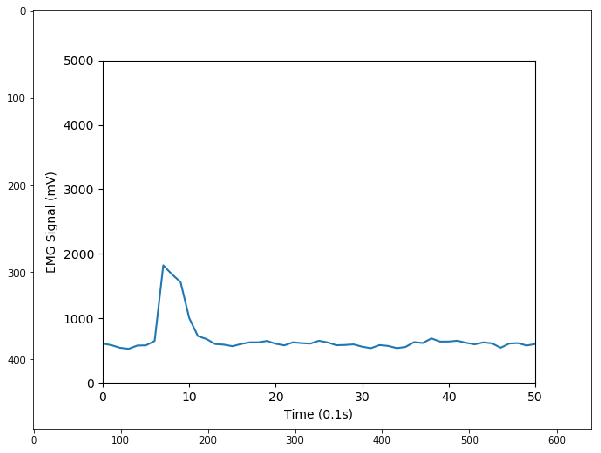

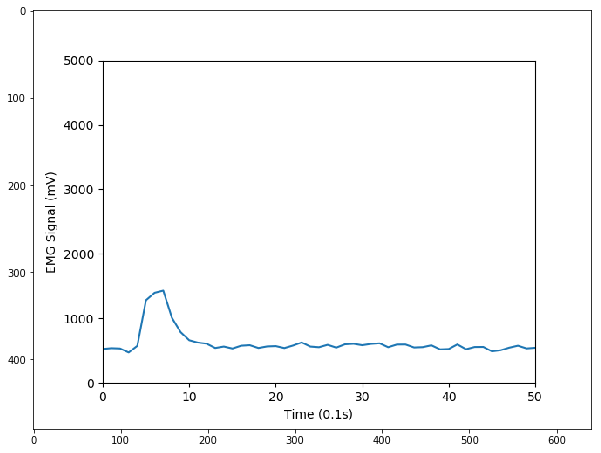

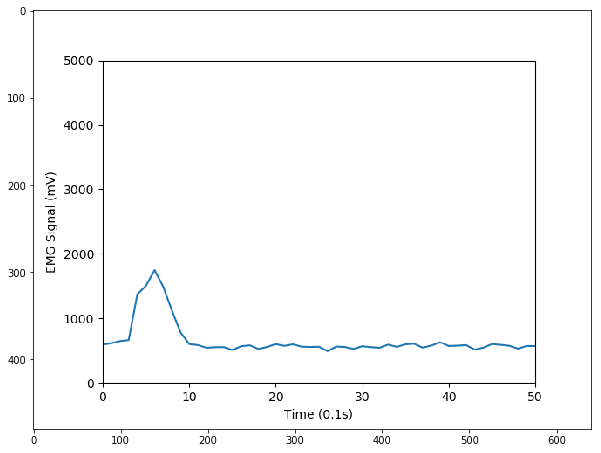

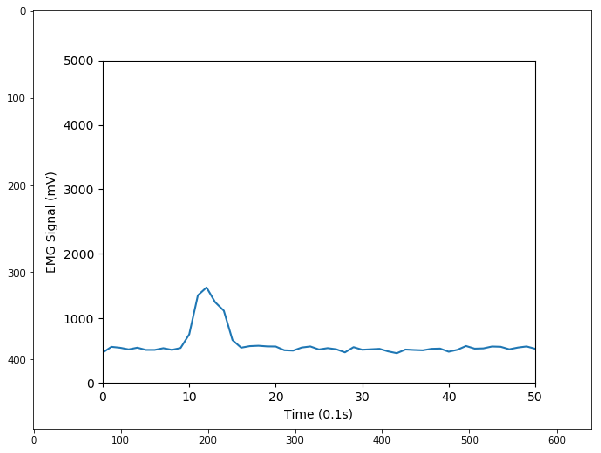

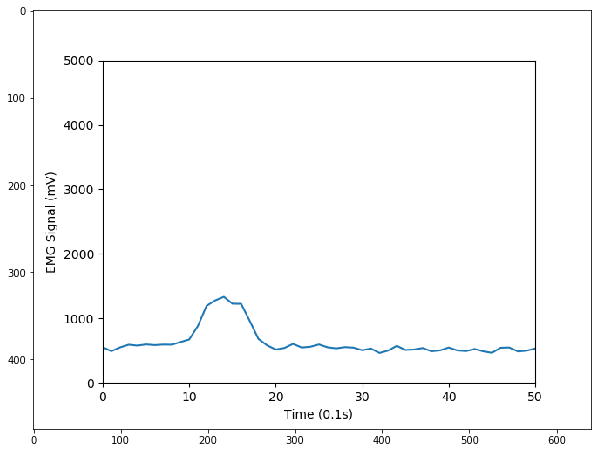

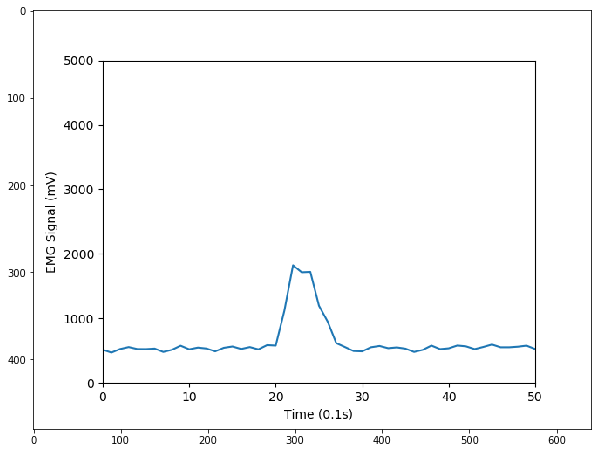

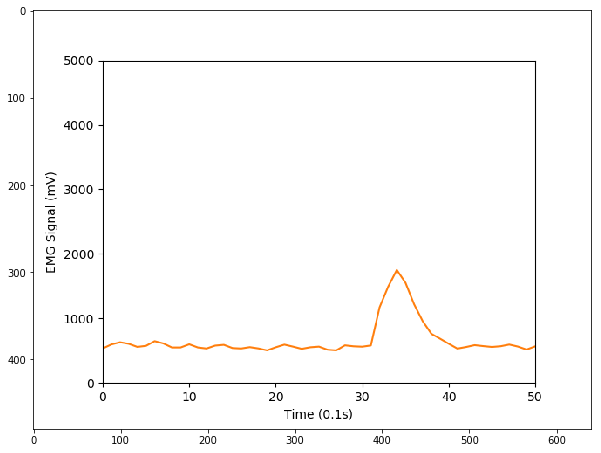

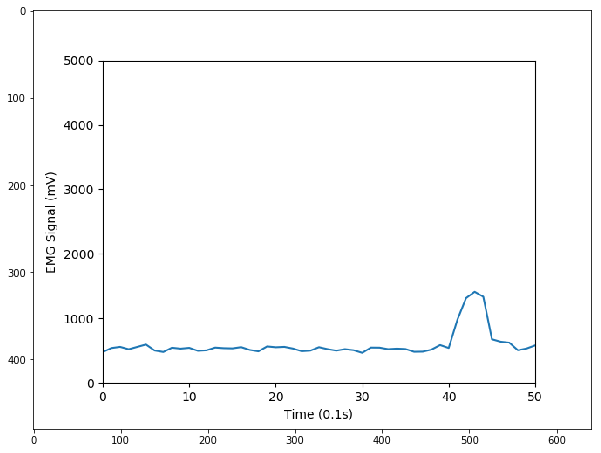

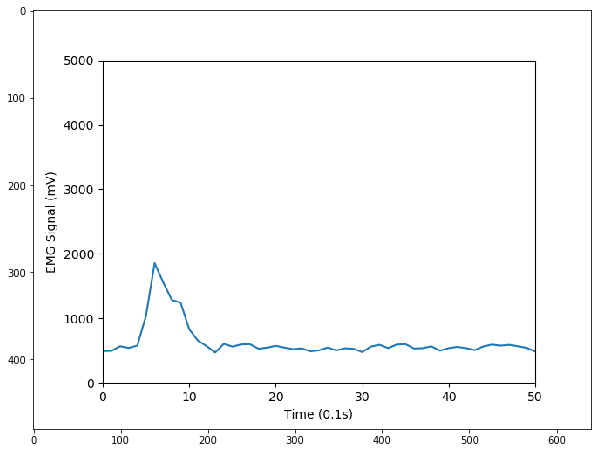

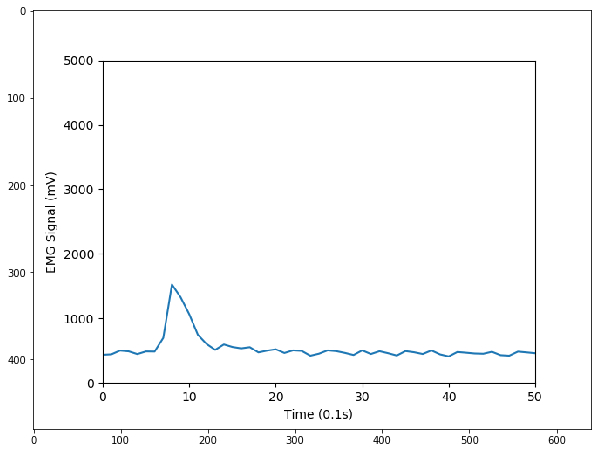

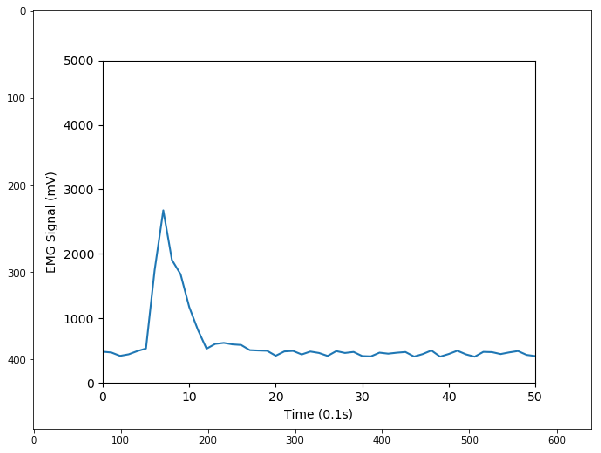

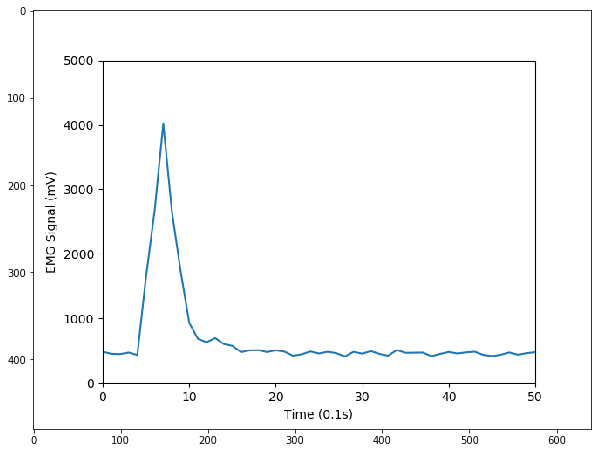

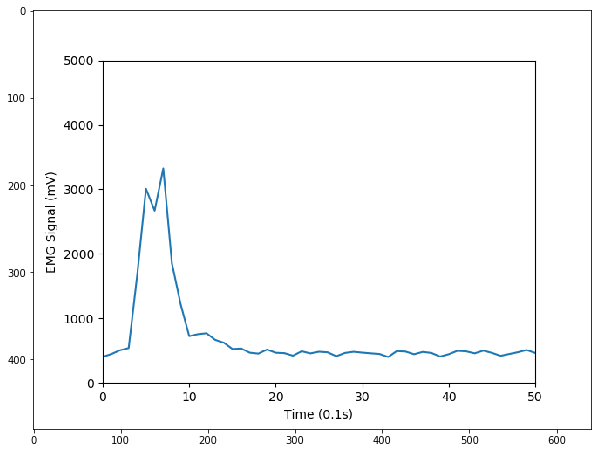

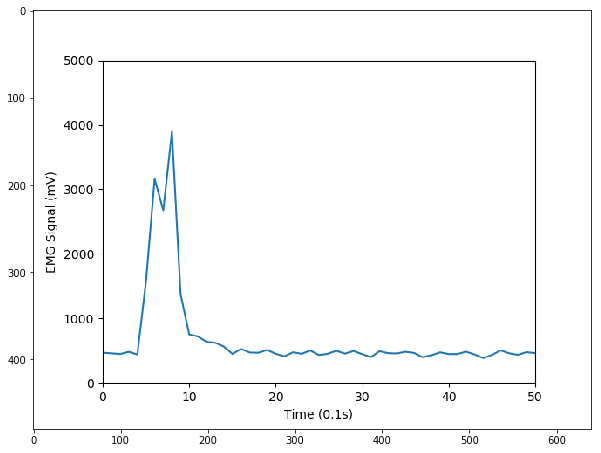

In [6]:
from sklearn.metrics import f1_score
import pandas as pd
from keras.models import load_model

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

model = load_model("vgg16_frozen.hdf5")

# get index of predicted part for each image in the test image set
part_predictions = [(model.predict(np.expand_dims(tensor, axis=0))) for tensor in unseen_tensors]

for x in range (0, len(unseen_files)):
    if ((part_predictions[x])[0])[1] > 0.999:
        print (part_predictions[x])
        img= mpimg.imread(unseen_files[x])
        plt.figure(figsize=(10,10))
        plt.imshow(img)